## Setting Up the Neural Network

In the first stage (w pierwszym etapie), we define a simple architecture of the neural network and train it to recognize digits in the MNIST dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import backend as K
 
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
 
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"
 
nb_classes = 10

The dropout layers have the very specific function to drop out (wykluczyć) a random set of activations in that layer by setting them to zero in the forward pass. This allows the model to avoid overfitting but should only be used at training time, not at test time.


In [2]:
# Set dropout rate - fractions of neurons to drop
dropout = 0.5
 
# Build very simple neural network with 2 hidden layers
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Preparing the Data

In [3]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utils to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
 
# Put everything on grayscale
X_train /= 255
X_test /= 255
 
# Convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
 
# Split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)

Let’s visualize an example digit:

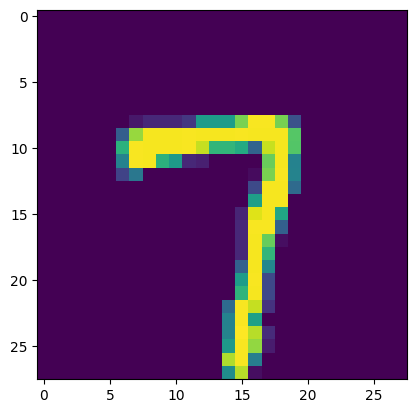

In [4]:
# Show example digit
plt.imshow(X_train[0].reshape(28, 28))

## Training the Model

In [5]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.
network_history = model.fit(X_train, Y_train, batch_size=128,
                           epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6506 - loss: 1.0550 - val_accuracy: 0.9346 - val_loss: 0.2259
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.3420 - val_accuracy: 0.9536 - val_loss: 0.1658
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9323 - loss: 0.2455 - val_accuracy: 0.9597 - val_loss: 0.1385
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.2124 - val_accuracy: 0.9613 - val_loss: 0.1334
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9468 - loss: 0.1906 - val_accuracy: 0.9660 - val_loss: 0.1211
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9537 - loss: 0.1639 - val_accuracy: 0.9659 - val_loss: 0.1167
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9584 - loss: 0.1465 - val_accuracy: 0.9711 - val_loss: 0.1058
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9607 - loss: 0.1401 - val_accuracy: 0.

We can visualize the training history:

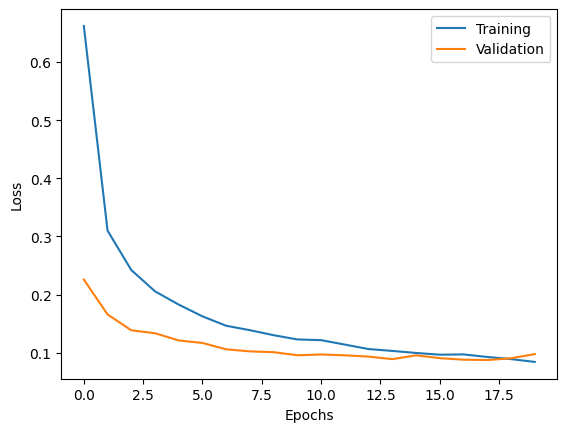

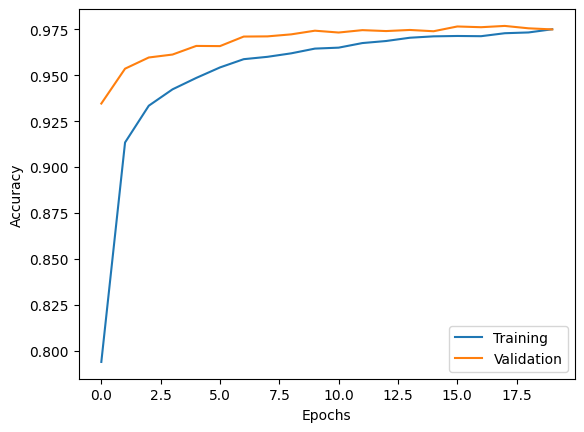

In [6]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
 
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
 
# The fit function returns a keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrics for each epoch.
# We can therefore plot the behavior of loss and accuracy during the training phase.
plot_history(network_history)

## Extracting Hidden Layer Activations

In [7]:
from keras.models import Model

# Wymuś aktywację .input
_ = model.predict(X_train[:1])

# Model pomocniczy
activation_model = Model(
    inputs=model.layers[0].input,
    outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output]
)

# Aktywacje
layer1_output, layer2_output, layer3_output = activation_model.predict(X_train)

train_ids = [np.arange(len(Y_train))[Y_train[:,i] == 1] for i in range(10)]




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step


## Visualizing Network Activations

The 2 visualizations below show how neuron activations work:

1. **First animation** shows what an example digit (number 5) looks like and what activations of neurons look like in hidden layers of the neural network.

2. **Second animation** checks the similarity (podobieństwo) in behavior for frames (zachowania dla klatek) showing the same digit by looking at the ensemble (zespołowe) properties. In this case, ensemble properties refers to how the neurons behave on average for a large number of frames showing the same digit.

After summing up (Po zsumowaniu) the responses of as few as 20–30 frames, the pattern in the second hidden layer is almost static. After combining (połączeniu) about 70–80 frames, the pattern in the first hidden layer also appears static. This supports the idea that only a subset of all neurons is involved in the recognition of individual digits.

This observation is important when we think about using neural networks for data visualization. We can clearly see that the activations generated by examples belonging to the same class are less chaotic than the examples themselves (one same); therefore, their visualization should give a more clustered structure.


In [8]:

from matplotlib import animation
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

sample_idxs = train_ids[5][:30]  # np. 30 próbek cyfry "5"

def animate(i):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()

    img = X_train[sample_idxs[i]].reshape(28, 28)
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title("Digit Image (5)")

    axs[1].bar(range(256), layer1_output[sample_idxs[i]])
    axs[1].set_title("Layer 1 activations")

    axs[2].bar(range(64), layer2_output[sample_idxs[i]])
    axs[2].set_title("Layer 2 activations")

ani = animation.FuncAnimation(fig, animate, frames=30, interval=500)
plt.close()
from IPython.display import HTML
HTML(ani.to_jshtml())


In [9]:
fig, ax = plt.subplots(figsize=(12, 3))
sample_idxs = train_ids[5][:80]  # 80 próbek cyfry 5

def animate_avg(i):
    ax.cla()
    avg_activation = layer1_output[sample_idxs[:i+1]].mean(axis=0)
    ax.bar(range(256), avg_activation)
    ax.set_title(f"Average Layer 1 activation (first {i+1} samples)")
    ax.set_ylim(0, 5)

ani = animation.FuncAnimation(fig, animate_avg, frames=80, interval=200)
plt.close()
HTML(ani.to_jshtml())


In [10]:
fig, ax = plt.subplots(figsize=(12, 3))
sample_idxs = train_ids[5][:80]  # 80 próbek cyfry 5

def animate_avg(i):
    ax.cla()
    avg_activation = layer2_output[sample_idxs[:i+1]].mean(axis=0)
    ax.bar(range(64), avg_activation)
    ax.set_title(f"Average Layer 2 activation (first {i+1} samples)")
    ax.set_ylim(0, 10)

ani2 = animation.FuncAnimation(fig, animate_avg, frames=80, interval=200)
plt.close()
HTML(ani2.to_jshtml())

# Exercise 1: MNIST Visualization Using Hidden Layer Activations

In this exercise, you will explore how the activations of hidden layers in a neural network can be used for data visualization and classification.


## Task Description

1. Project the MNIST training data into a 2-dimensional space using different dimensionality reduction techniques:
   - t-SNE  
   - TriMAP  
   - PaCMAP  
   - UMAP

2. Use `layer1_output` and `layer2_output` to project the first and second hidden layers of the neural network into a 2-dimensional space. Apply the same dimensionality reduction methods as in step 1.

3. Visualize both the training and test data projections.

4. Use the 2-dimensional projections (2 wymiarowa projekcja) for classification:
   - Use embeddings learned (osadzeń) on raw training data (and also on hidden activations of training data) to transform test data (and hidden activations of test data) into 2-dimensional space.
   - Implement the k-nearest neighbors algorithm to classify transformed points from the test set, using points from the training set as neighbors with known class assignments.
   - Since t-SNE is a non-linear, non-parametric embedding, you can’t use it to transform new points into the existing embedded space (przestrzeni osadzeń). Use only UMAP, which has both `fit_transform` (learn manifold) and `transform` (project new data to existing manifold (rozmaitość)) methods.
   - Try with several values of `n_neighbors`, e.g., [3, 5, 10].

5. Estimate the classification accuracy using this approach:
   - Compare results for all three inputs (raw data, 1st hidden layer, 2nd hidden layer)
   - Compare results for different values of `n_neighbors`


## Code Template
Here’s a template to help you get started:

In [11]:
# To get hidden activations of test data use:
test_layer1_output, test_layer2_output, test_layer3_output = activation_model.predict(X_test)
 
# To convert from one-hot encoding back to class labels:
# Use np.argmax(to_categorical(x, k), axis=1) or K.argmax

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


## Step 1: Raw Data Embeddings Visualization

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


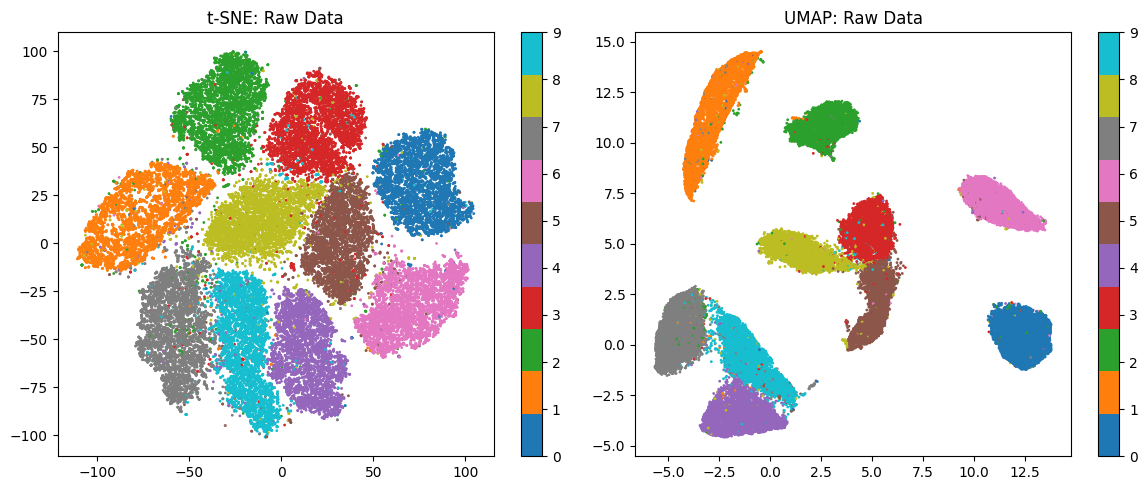

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


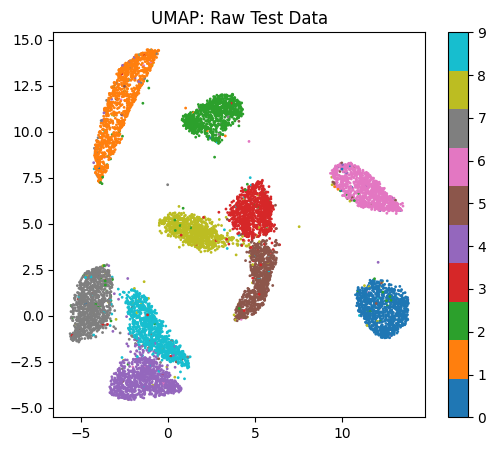

In [12]:
# Import necessary libraries
from sklearn.manifold import TSNE
import umap
# Import other visualization techniques you need
 
# Apply t-SNE to raw training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
 
# Apply UMAP to raw training data
umap_model = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
 
# Visualize the embeddings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
plt.title('t-SNE: Raw Data')
plt.colorbar()
 
plt.subplot(1, 2, 2)
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
plt.title('UMAP: Raw Data')
plt.colorbar()
plt.tight_layout()
plt.show()
 
# Apply UMAP transform to test data
X_test_umap = umap_model.transform(X_test)
 
# Visualize test data projection
plt.figure(figsize=(6, 5))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=np.argmax(Y_test, axis=1), cmap='tab10', s=1)
plt.title('UMAP: Raw Test Data')
plt.colorbar()
plt.show()

## Step 2: Hidden Layer 1 Embeddings Visualization
## Step 3: Hidden Layer 2 Embeddings Visualization

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs valu

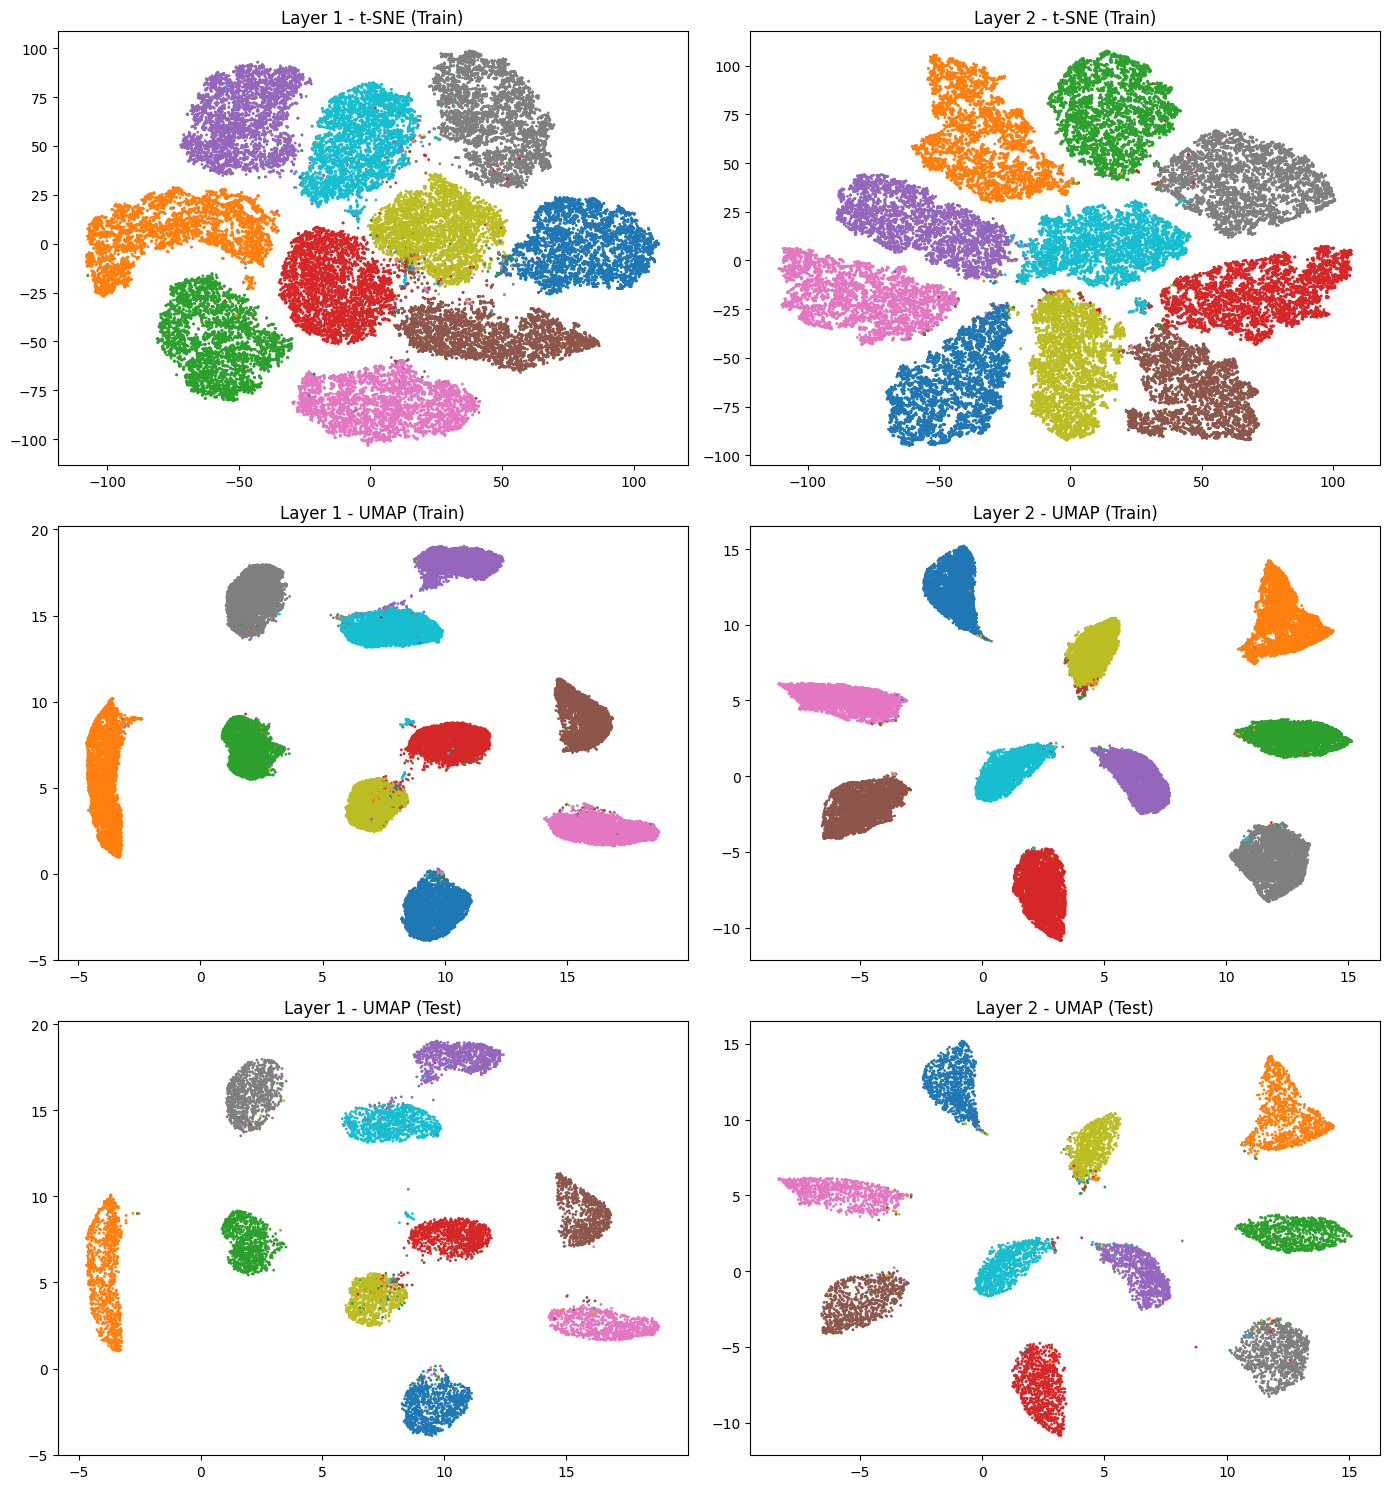

In [13]:


# t-SNE i UMAP dla layer1_output
tsne_layer1 = TSNE(n_components=2, random_state=42)
X_layer1_tsne = tsne_layer1.fit_transform(layer1_output)

umap_model_layer1 = umap.UMAP(n_components=2, random_state=42)
X_layer1_umap = umap_model_layer1.fit_transform(layer1_output)
X_layer1_umap_test = umap_model_layer1.transform(test_layer1_output)

# t-SNE i UMAP dla layer2_output
tsne_layer2 = TSNE(n_components=2, random_state=42)
X_layer2_tsne = tsne_layer2.fit_transform(layer2_output)

umap_model_layer2 = umap.UMAP(n_components=2, random_state=42)
X_layer2_umap = umap_model_layer2.fit_transform(layer2_output)
X_layer2_umap_test = umap_model_layer2.transform(test_layer2_output)

# Wizualizacja
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Layer 1 t-SNE
axs[0, 0].scatter(X_layer1_tsne[:, 0], X_layer1_tsne[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[0, 0].set_title("Layer 1 - t-SNE (Train)")

# Layer 2 t-SNE
axs[0, 1].scatter(X_layer2_tsne[:, 0], X_layer2_tsne[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[0, 1].set_title("Layer 2 - t-SNE (Train)")

# Layer 1 UMAP - Train
axs[1, 0].scatter(X_layer1_umap[:, 0], X_layer1_umap[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[1, 0].set_title("Layer 1 - UMAP (Train)")

# Layer 2 UMAP - Train
axs[1, 1].scatter(X_layer2_umap[:, 0], X_layer2_umap[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[1, 1].set_title("Layer 2 - UMAP (Train)")

# Layer 1 UMAP - Test
axs[2, 0].scatter(X_layer1_umap_test[:, 0], X_layer1_umap_test[:, 1], c=np.argmax(Y_test, axis=1), cmap='tab10', s=1)
axs[2, 0].set_title("Layer 1 - UMAP (Test)")

# Layer 2 UMAP - Test
axs[2, 1].scatter(X_layer2_umap_test[:, 0], X_layer2_umap_test[:, 1], c=np.argmax(Y_test, axis=1), cmap='tab10', s=1)
axs[2, 1].set_title("Layer 2 - UMAP (Test)")

plt.tight_layout()
plt.show()


## Step 4: Classification and Accuracy Calculation

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
# Define a function to evaluate KNN on different embeddings
def evaluate_knn(X_train_embedded, X_test_embedded, y_train, y_test, n_neighbors_list):
    results = []
    for n_neighbors in n_neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_embedded, y_train)
        y_pred = knn.predict(X_test_embedded)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((n_neighbors, accuracy))
        print(f"n_neighbors={n_neighbors}, Accuracy: {accuracy:.4f}")
    return results
 
# Convert Y_train and Y_test to class labels
y_train = np.argmax(Y_train, axis=1)
y_test = np.argmax(Y_test, axis=1)
 
# Test KNN with different numbers of neighbors
n_neighbors_list = [3, 5, 10]
 
print("Raw Data UMAP Embeddings:")
raw_results = evaluate_knn(X_train_umap, X_test_umap, y_train, y_test, n_neighbors_list)
 
print("\nHidden Layer 1 UMAP Embeddings:")
layer1_results = evaluate_knn(X_layer1_umap, X_layer1_umap_test, y_train, y_test, n_neighbors_list)

print("\nHidden Layer 2 UMAP Embeddings:")
layer2_results = evaluate_knn(X_layer2_umap, X_layer2_umap_test, y_train, y_test, n_neighbors_list)

Raw Data UMAP Embeddings:
n_neighbors=3, Accuracy: 0.9518
n_neighbors=5, Accuracy: 0.9548
n_neighbors=10, Accuracy: 0.9557

Hidden Layer 1 UMAP Embeddings:
n_neighbors=3, Accuracy: 0.9697
n_neighbors=5, Accuracy: 0.9714
n_neighbors=10, Accuracy: 0.9713

Hidden Layer 2 UMAP Embeddings:
n_neighbors=3, Accuracy: 0.9770
n_neighbors=5, Accuracy: 0.9777
n_neighbors=10, Accuracy: 0.9779


## Expected Outcomes

1. You should observe that the visualization of hidden layer activations shows better clustering compared to raw data visualization.

2. The second hidden layer activations should generally show clearer class separation than the first hidden layer.

3. Classification accuracy should generally improve when using hidden layer activations compared to raw data, with the later layers typically providing better performance.

4. The choice of `n_neighbors` will impact performance, with the optimal value possibly differing between raw data and hidden layer embeddings.


# Exercise 2: Fashion-MNIST Visualization

In this exercise, you will repeat the procedures and visualizations from Exercise 1, but now using the Fashion-MNIST dataset (or any other dataset of your choice).

## Task Description

The Fashion-MNIST dataset is a dataset of Zalando’s article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:

0. T-shirt/top  
1. Trouser  
2. Pullover  
3. Dress  
4. Coat  
5. Sandal  
6. Shirt  
7. Sneaker  
8. Bag  
9. Ankle boot  

## Steps

1. Load and preprocess the Fashion-MNIST dataset.
2. Create and train a neural network similar to the one used for MNIST.
3. Extract the hidden layer activations.
4. Apply dimensionality reduction techniques (t-SNE, TriMAP, PaCMAP, UMAP) to visualize:
   - Raw data
   - First hidden layer activations
   - Second hidden layer activations
5. Use UMAP embeddings for classification with KNN.
6. Compare the results with those obtained for the MNIST dataset.


## Code Template

### 1. Load and preprocess the Fashion-MNIST dataset.

In [15]:
# Load the Fashion-MNIST dataset
from keras.datasets import fashion_mnist
 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
 
# Preprocess data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
 
# Normalize data
X_train /= 255
X_test /= 255
 
# Convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
 
# Split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)
 

### 2. Create and train a neural network similar to the one used for MNIST.

In [16]:
model_fmnist = Sequential()
model_fmnist.add(Dense(256, activation='relu', input_shape=(784,)))
model_fmnist.add(Dropout(dropout))
model_fmnist.add(Dense(64, activation='relu'))
model_fmnist.add(Dropout(dropout))
model_fmnist.add(Dense(nb_classes, activation='softmax'))
 
model_fmnist.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

network_history = model_fmnist.fit(X_train, Y_train, batch_size=128,
                           epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20


c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5945 - loss: 1.1321 - val_accuracy: 0.8315 - val_loss: 0.4755
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.5757 - val_accuracy: 0.8410 - val_loss: 0.4397
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8195 - loss: 0.5152 - val_accuracy: 0.8531 - val_loss: 0.4005
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8316 - loss: 0.4774 - val_accuracy: 0.8590 - val_loss: 0.3865
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8423 - loss: 0.4525 - val_accuracy: 0.8712 - val_loss: 0.3604
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8450 - loss: 0.4391 - val_accuracy: 0.8721 - val_loss: 0.3564
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.4278 - val_accuracy: 0.8754 - val_loss: 0.3400
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8533 - loss: 0.4203 - val_accuracy: 0.8781 - val_

### 3. Extract the hidden layer activations.

In [23]:
activation_model_fmnist = Model(
    inputs=model_fmnist.layers[0].input,
    outputs=[model_fmnist.layers[0].output, model_fmnist.layers[2].output, model_fmnist.layers[4].output]
)


layer1_output, layer2_output, layer3_output = activation_model_fmnist.predict(X_train)
test_layer1_output, test_layer2_output, test_layer3_output = activation_model_fmnist.predict(X_test)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step


### 4. Apply dimensionality reduction techniques (t-SNE, TriMAP, PaCMAP, UMAP) to visualize: - Raw data - First hidden layer activations - Second hidden layer activations

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


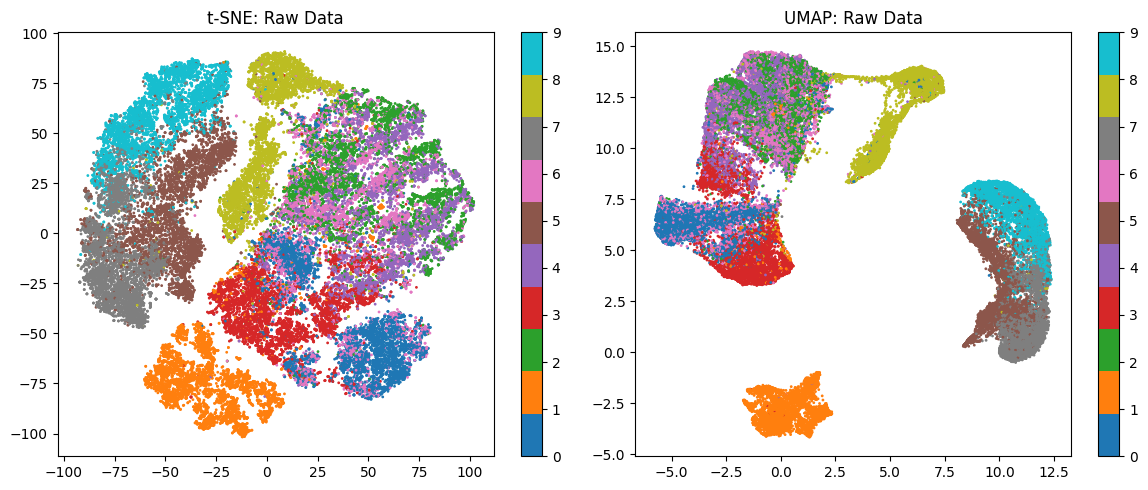

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


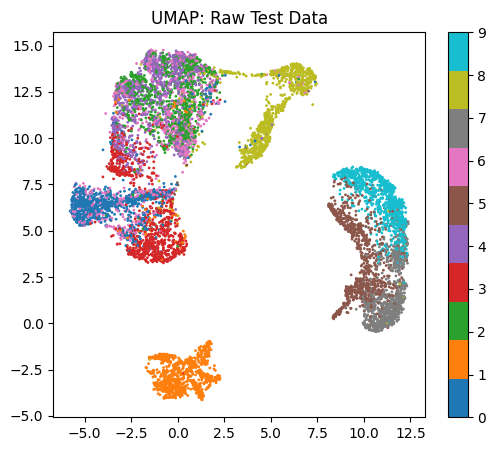

In [18]:

# Apply t-SNE to raw training data
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
 
# Apply UMAP to raw training data
umap_model = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
 
# Visualize the embeddings
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
plt.title('t-SNE: Raw Data')
plt.colorbar()
 
plt.subplot(1, 2, 2)
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
plt.title('UMAP: Raw Data')
plt.colorbar()
plt.tight_layout()
plt.show()
 
# Apply UMAP transform to test data
X_test_umap = umap_model.transform(X_test)
 
# Visualize test data projection
plt.figure(figsize=(6, 5))
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=np.argmax(Y_test, axis=1), cmap='tab10', s=1)
plt.title('UMAP: Raw Test Data')
plt.colorbar()
plt.show()

c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\jacek\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs valu

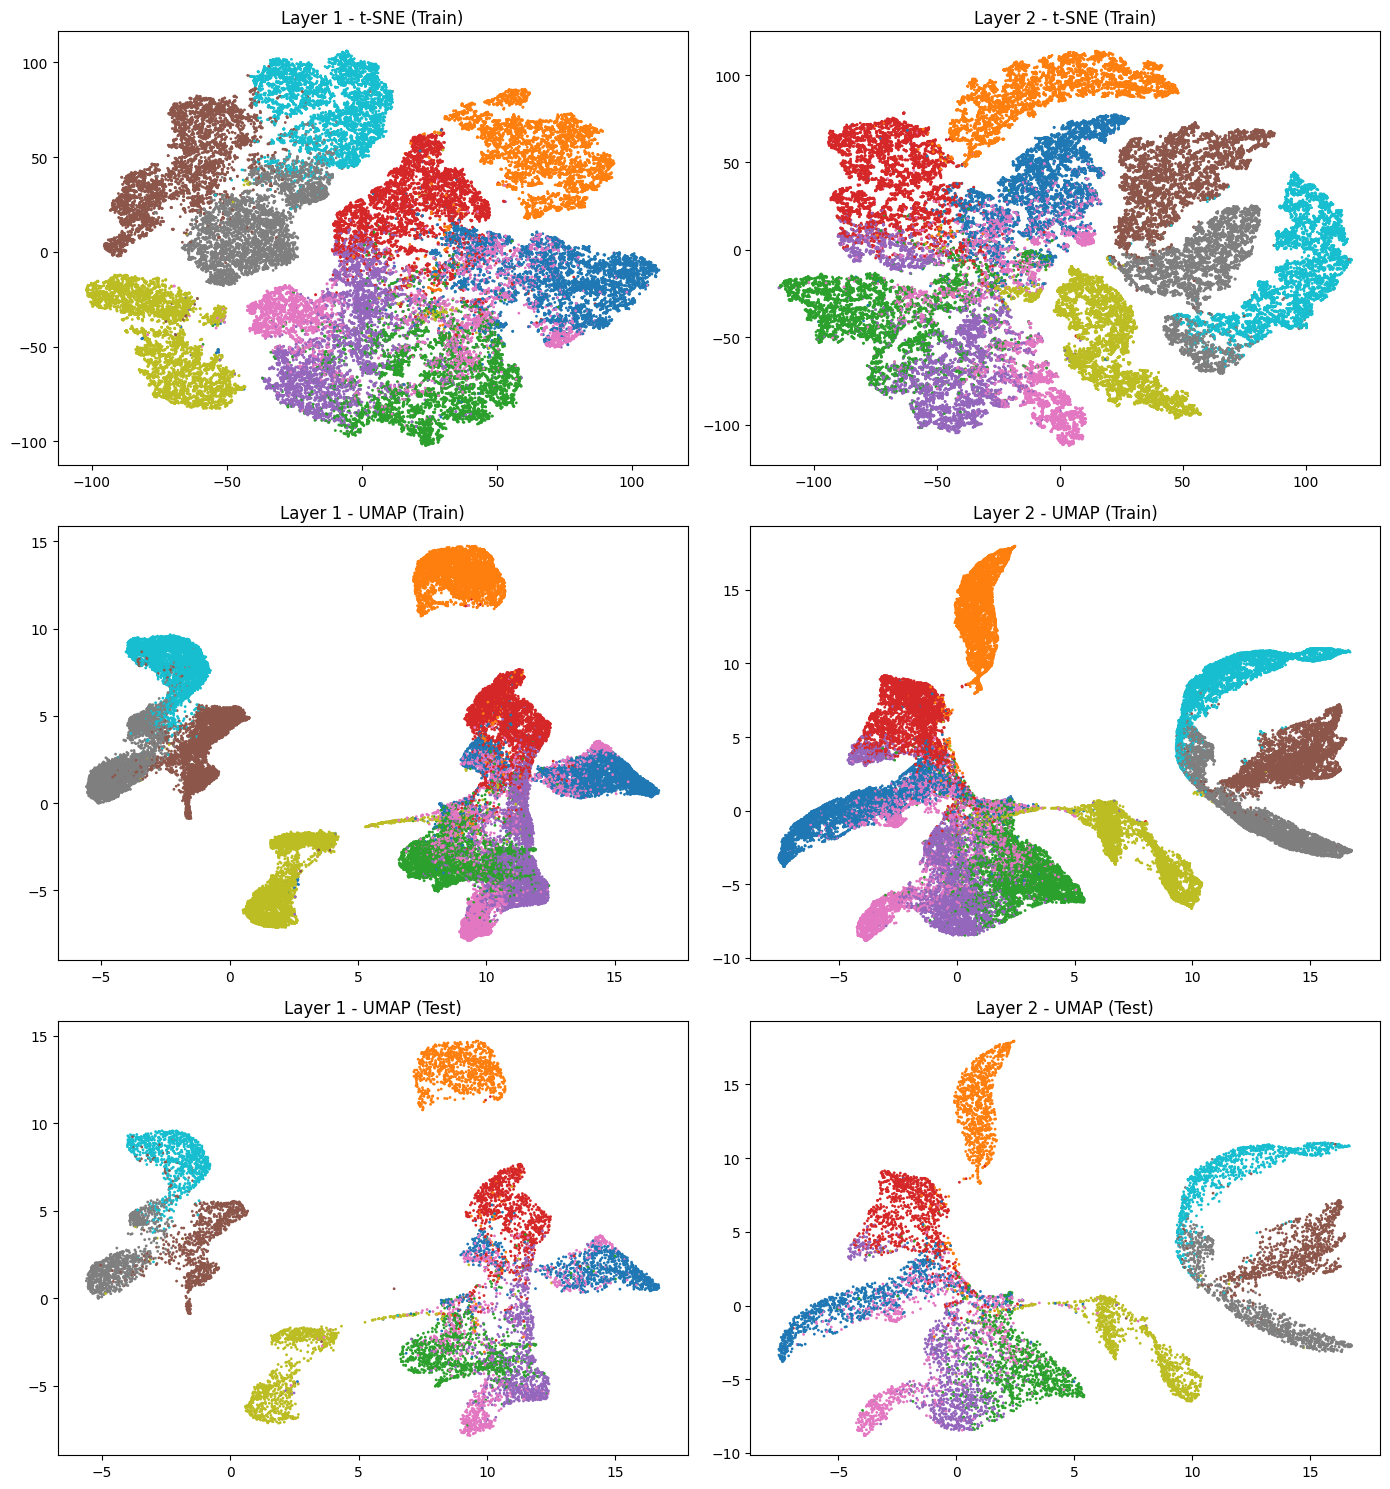

In [34]:


# t-SNE i UMAP dla layer1_output
tsne_layer1 = TSNE(n_components=2, random_state=42)
X_layer1_tsne = tsne_layer1.fit_transform(layer1_output)

umap_model_layer1 = umap.UMAP(n_components=2, random_state=42)
X_layer1_umap = umap_model_layer1.fit_transform(layer1_output)
X_layer1_umap_test = umap_model_layer1.transform(test_layer1_output)

# t-SNE i UMAP dla layer2_output
tsne_layer2 = TSNE(n_components=2, random_state=42)
X_layer2_tsne = tsne_layer2.fit_transform(layer2_output)

umap_model_layer2 = umap.UMAP(n_components=2, random_state=42)
X_layer2_umap = umap_model_layer2.fit_transform(layer2_output)
X_layer2_umap_test = umap_model_layer2.transform(test_layer2_output)

# Wizualizacja
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# Layer 1 t-SNE
axs[0, 0].scatter(X_layer1_tsne[:, 0], X_layer1_tsne[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[0, 0].set_title("Layer 1 - t-SNE (Train)")

# Layer 2 t-SNE
axs[0, 1].scatter(X_layer2_tsne[:, 0], X_layer2_tsne[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[0, 1].set_title("Layer 2 - t-SNE (Train)")

# Layer 1 UMAP - Train
axs[1, 0].scatter(X_layer1_umap[:, 0], X_layer1_umap[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[1, 0].set_title("Layer 1 - UMAP (Train)")

# Layer 2 UMAP - Train
axs[1, 1].scatter(X_layer2_umap[:, 0], X_layer2_umap[:, 1], c=np.argmax(Y_train, axis=1), cmap='tab10', s=1)
axs[1, 1].set_title("Layer 2 - UMAP (Train)")

# Layer 1 UMAP - Test
axs[2, 0].scatter(X_layer1_umap_test[:, 0], X_layer1_umap_test[:, 1], c=np.argmax(Y_test, axis=1), cmap='tab10', s=1)
axs[2, 0].set_title("Layer 1 - UMAP (Test)")

# Layer 2 UMAP - Test
axs[2, 1].scatter(X_layer2_umap_test[:, 0], X_layer2_umap_test[:, 1], c=np.argmax(Y_test, axis=1), cmap='tab10', s=1)
axs[2, 1].set_title("Layer 2 - UMAP (Test)")

plt.tight_layout()
plt.show()


In [ ]:
class_names = [
    'T-shirt/top',  # 0 – niebieski
    'Trouser',      # 1 – pomarańczowy
    'Pullover',     # 2 – zielony
    'Dress',        # 3 – czerwony
    'Coat',         # 4 – fioletowy
    'Sandal',       # 5 – brązowy
    'Shirt',        # 6 – różowy
    'Sneaker',      # 7 – szary
    'Bag',          # 8 – oliwkowy
    'Ankle boot'    # 9 – jasnoniebieski
]

### 5. Use UMAP embeddings for classification with KNN.

In [25]:

 
# Define a function to evaluate KNN on different embeddings
def evaluate_knn(X_train_embedded, X_test_embedded, y_train, y_test, n_neighbors_list):
    results = []
    for n_neighbors in n_neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn.fit(X_train_embedded, y_train)
        y_pred = knn.predict(X_test_embedded)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((n_neighbors, accuracy))
        print(f"n_neighbors={n_neighbors}, Accuracy: {accuracy:.4f}")
    return results
 
# Convert Y_train and Y_test to class labels
y_train = np.argmax(Y_train, axis=1)
y_test = np.argmax(Y_test, axis=1)
 
# Test KNN with different numbers of neighbors
n_neighbors_list = [3, 5, 10]
 
print("Raw Data UMAP Embeddings:")
raw_results = evaluate_knn(X_train_umap, X_test_umap, y_train, y_test, n_neighbors_list)
 
print("\nHidden Layer 1 UMAP Embeddings:")
layer1_results = evaluate_knn(X_layer1_umap, X_layer1_umap_test, y_train, y_test, n_neighbors_list)

print("\nHidden Layer 2 UMAP Embeddings:")
layer2_results = evaluate_knn(X_layer2_umap, X_layer2_umap_test, y_train, y_test, n_neighbors_list)

Raw Data UMAP Embeddings:
n_neighbors=3, Accuracy: 0.7415
n_neighbors=5, Accuracy: 0.7596
n_neighbors=10, Accuracy: 0.7721

Hidden Layer 1 UMAP Embeddings:
n_neighbors=3, Accuracy: 0.8427
n_neighbors=5, Accuracy: 0.8506
n_neighbors=10, Accuracy: 0.8573

Hidden Layer 2 UMAP Embeddings:
n_neighbors=3, Accuracy: 0.8487
n_neighbors=5, Accuracy: 0.8551
n_neighbors=10, Accuracy: 0.8632


In [26]:
loss, accuracy = model_fmnist.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8775 - loss: 0.3394
Test accuracy: 0.8759


### 6. Compare the results with those obtained for the MNIST dataset.

We can see that when we embed the raw data using UMAP, the classification results are worse compared to using the preprocessed data from the first and second hidden layers of the network on the Fashion-MNIST dataset. In general, we obtain better classification results from the second hidden layer. Additionally, when we test KNN with k = 3, 5, 10, the classification accuracy increases with the value of k. The same conclusions were observed for the MNIST dataset. Furthermore, the UMAP visualizations show that the data is more separable after passing through the network layers compared to the raw input data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


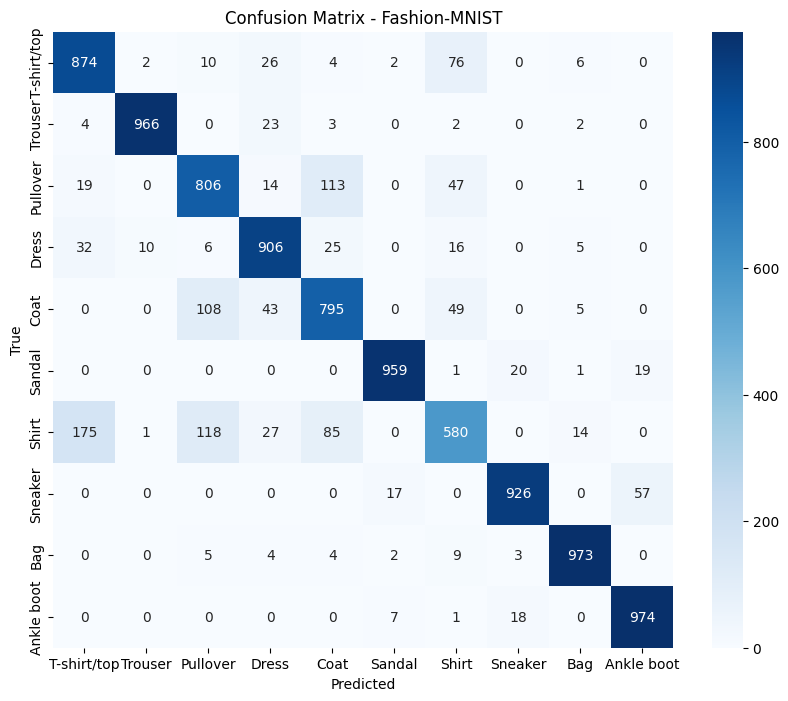

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = np.argmax(Y_test, axis=1)

y_pred_probs = model_fmnist.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Fashion-MNIST')
plt.show()

## Expected Outcomes

1. **Compare the visualization results between MNIST and Fashion-MNIST:**
   - Are class boundaries (granice) clearer in one dataset versus the other?
   - Do hidden layer activations provide better separation in Fashion-MNIST compared to raw data?
   - Which classes in Fashion-MNIST are most easily (najbardziej) confused (mylone) in the visualizations?

2. **Compare classification performance:**
   - How does accuracy on Fashion-MNIST compare to MNIST?
   - Does using hidden layer activations provide a similar boost in performance for Fashion-MNIST as it did for MNIST?
   - Which classes benefit most from using hidden layer activations for classification?

1.1 Yes, the MNIST boundaries is clealer than Fashion-MNIST boundaries, because MNIST Dataset has a simpler structure.  
1.2 Yes, hidden layer activations provide better separation in Fashion-MNIST compared to raw input data, as visible in UMAP/t-SNE visualizations.  
1.3 The most easily confused classes are Shirt with T-shirt.  

2.1 The accuracy on Fashion-MNIST is lower than MNIST.  
2.2 No, in Fashion-MNIST the improvement from using hidden layer activations is smaller compared to MNIST.  
2.3 The classes that benefit the most from hidden layer activations for classification are Sandal, Sneaker, and Ankle boot, which are clearly separated in the deeper layers.  





## Discussion Questions

1. How does the neural network’s representation of fashion items differ from its representation of digits?
2. What might explain any differences in visualization clarity or classification performance between the two datasets?
3. Which dimensionality reduction technique works best for Fashion-MNIST, and is this the same as what worked best for MNIST?
4. How might you modify the neural network architecture to improve visualization or classification for Fashion-MNIST specifically?


1. The representation of Fashion-MNIST data is more complex than that of MNIST. Digits have very distinctive shapes, which is why even the raw data performs well as a classifier.  
2. The key difference lies in data complexity: digits have simpler visual structures, while clothing items can vary significantly in details such as shape, texture, and style.
3. For Fashion-MNIST, UMAP provides better class separation and more compact clusters than t-SNE, especially in the deeper hidden layers. 
4. For example: Add more hidden layers or replace dense layers with convolutional layers.